## Bethany Ludwig

Due by 2 PM on Monday May 27th
----
 - Use the same data set from homework #5.
 - Plot the data, the true function that the data came from.
 - Use SVR to fit the data with Linear, Radial Basis Function, and Polynomial kernel functions, with the default parameter values.
 - Calculate the mean squared error of the fits.
 - Discuss how you think the tunable parameter values of SVR and the kernel functions should be changed to improve the fit. (e.g. increase gamma for the rbf kernel)
 - Use GridSearchCV to determine the optimal values of the tunable parameters for SVR and the Linear and Radial Basis Function kernel functions. (poly is more computationally expensive, so you can skip it.) Then fit the data with SVR.
 - Calculate the mean squared error of the fits.
 - Compare the various fits and discuss any overfitting or underfitting you see.  

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as optimization 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV
plt.style.use("seaborn-bright")

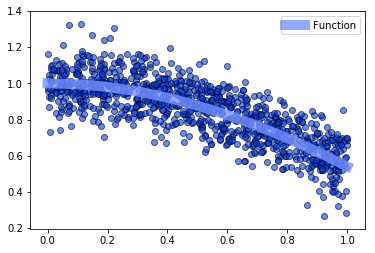

In [2]:
# Plot the data, the true function that the data came from.
# Create Data
n_samples = 1000
X = np.random.rand(n_samples); y = np.cos(X) + 0.1 * np.random.randn(n_samples)
X = X.reshape(n_samples,1)
# Create Function
xx = np.arange(0,1.1,0.1)
yy = np.cos(xx) 
# Plot 
plt.figure()
plt.scatter(X,y,alpha=0.6,edgecolor='black')
plt.plot(xx,yy,linewidth=10,c="#7692FF",label="Function",alpha=0.8)
plt.legend()

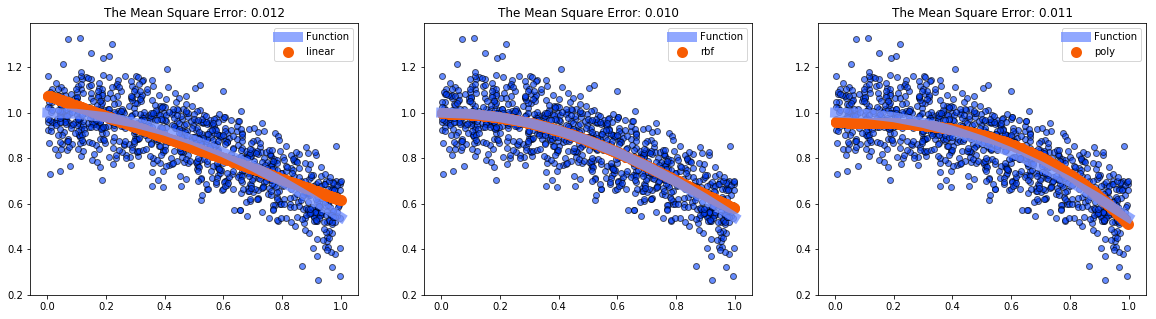

In [6]:
# Split up the data into training and testing 
X_train = X[:-int(n_samples/2)]
X_test = X[-int(n_samples/2):]

y_train = y[:-int(n_samples/2)]
y_test = y[-int(n_samples/2):]

# Use SVR to fit the data with Linear, Radial Basis Function, and Polynomial kernel functions, with the default parameter values.
kernel_names = ["linear","rbf","poly"]
clf= [SVR(kernel=kern,gamma="auto").fit(X_train,y_train) for kern in kernel_names]
y_predict = [fit.predict(X_test) for fit in clf]

# Calculate the mean squared error of the fits.
mse = [mean_squared_error(y_test,predict) for predict in y_predict ]

# Plot 
f, axes = plt.subplots(1,3,figsize=(20,5))
for i in range(3):
    axes[i].set_title(("The Mean Square Error: {:.3f}").format(mse[i]))
    axes[i].scatter(X,y,alpha=0.6,edgecolor='black')
    axes[i].plot(xx,yy,linewidth=10,c="#7692FF",label="Function",alpha=0.8)
    axes[i].scatter(X_test,y_predict[i],linestyle="-",c="#F75C03",label=kernel_names[i],linewidth=5)
    axes[i].legend()

### Discuss how you think the tunable parameter values of SVR and the kernel functions should be changed to improve the fit. (e.g. increase gamma for the rbf kernel)  
- Gamma  
This is the kernel coefficient for rbf and poly. Its default value is 1 / n_features but if set to scale it would increase depending on the variance of the data. In our case, the variance is ~ 0.09 so dividing by this value would increase the coefficient. The rbf fits very well right out of the box for this particular type of data, but the gamma valued could potentially be increased for the poly kernel.
- Degree  
This is specifically for the polynomial kernel function. The default is 3 degrees but as this data set isn't particularly curvy it would make sense to decrease this.  
- C 
This is the regularization or penalty parameter. It tells the fit how much error between the scatter point and the actual function is allowed. The default is 1 but due to the spread in scatter points it would make sense to increase this. 


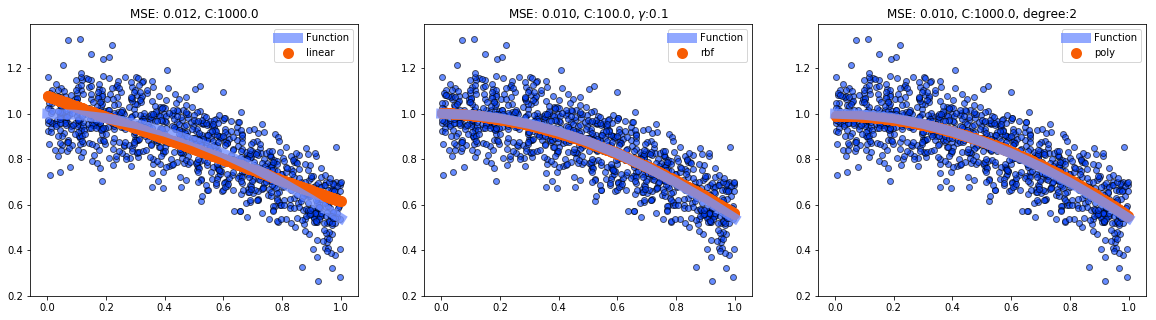

In [9]:
# Use GridSearchCV to determine the optimal values of the tunable parameters for SVR and the Linear and Radial Basis Function kernel functions. (poly is more computationally expensive, so you can skip it.) 
# Then fit the data with SVR
kernel_names = ["linear","rbf","poly"]; cv = 5
param_grids = [{"C": [1e0, 1e1, 1e2, 1e3]},
              {"C": [1e0, 1e1, 1e2, 1e3],"gamma": np.logspace(-2, 2, 5)},
              {"C": [1e0, 1e1, 1e2, 1e3],'degree':[0,1,2,3,4,5,6]}]

clfs = [GridSearchCV(SVR(kernel=kernel_names[i],gamma=0.1),
                          param_grid = param_grids[i],
                          cv=cv).fit(X_train,y_train) for i in range(3)]

y_predicts = [fit.predict(X_test) for fit in clfs]

# Calculate the mean squared error of the fits.
mses = [mean_squared_error(y_test,predict) for predict in y_predicts ]

titles = [("MSE: {:.3f}, C:{}").format(mses[0],clfs[0].best_params_['C']),
          ("MSE: {:.3f}, C:{}, $\gamma$:{}").format(mses[1],clfs[1].best_params_['C'],clfs[1].best_params_['gamma']),
          ("MSE: {:.3f}, C:{}, degree:{}").format(mses[2],clfs[2].best_params_['C'],clfs[2].best_params_['degree'])]
# Plot 
f, axes = plt.subplots(1,3,figsize=(20,5))
for i in range(3):
    axes[i].set_title(titles[i])
    axes[i].scatter(X,y,alpha=0.6,edgecolor='black')
    axes[i].plot(xx,yy,linewidth=10,c="#7692FF",label="Function",alpha=0.8)
    axes[i].scatter(X_test,y_predicts[i],linestyle="-",c="#F75C03",label=kernel_names[i],linewidth=5)
    axes[i].legend()

### Compare the various fits and discuss any overfitting or underfitting you see.  
- MSE: Interestingly enough, the mean squared error doesn't change much even after optimizing the parameters. This may indicate either that any change is only infinitesimally better, or that this error isn't enough to quantify the best fit. Just by looking at the plots, it seems the former isn't true. Both the RBF and Poly fit are substantially improved.
- Over/under fitting: I did not allow gamma to vary in the poly fit because of the computational expense. The rbf seems to over/under fit less than poly but both fits are pretty good and it would be difficult to say that poly couldn't be fit better if gamma was allowed to vary. However, rbf seems to be adequate and computationally inexpensive. Needless to say, linear isn't much improved but as the data isn't linear, this is expected.